In [1]:
import os, pickle, re, glob, time
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style('ticks')
pd.set_option('precision', 2)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Figure 2C (v1)

- PhD_NUS\Research\CaDRReS2\output\ess_gene_pcor
    - gdsc_drugMedianGE0_cv01_10dim_pred.csv vs gdsc_drugMedianGE0_cv01_10dim_obs.csv. For train add _train.
    - gdsc_drugMedianGE0_cv01_wo_bp_10dim_pred.csv vs gdsc_drugMedianGE0_cv01_10dim_obs.csv. For train add _train.
- PhD_NUS\Research\CaDRReS2\data\drug_response\GDSC

##### Validation

In [4]:
# ori_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_pred.csv')
# ori_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_obs.csv')
# new_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_pred.csv')
# new_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_obs.csv')

In [5]:
# ori_pred_df_list = []
# ori_obs_df_list = []

# new_pred_df_list = []
# new_obs_df_list = []

# for fname in sorted(ori_pred_fname_list):
#     ori_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(ori_obs_fname_list):
#     ori_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_pred_fname_list):
#     new_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_obs_fname_list):
#     new_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# drug_list = ori_pred_df_list[0].columns
# len(drug_list)

In [2]:
# def cal_scor_per_drug(obs_df_list, pred_df_list):

#     k_df_list = []

#     for k in range(5):

#         k_obs_df = obs_df_list[k]
#         k_pred_df = pred_df_list[k]
#         common_samples = sorted(list(k_obs_df.index & k_pred_df.index))

#         obs_mat = np.array(obs_df_list[k])
#         pred_mat = np.array(pred_df_list[k])

#         scor_list = []

#         for d, _ in enumerate(drug_list):
#             x = obs_mat[:, d]
#             y = pred_mat[:, d]

#             sel_bool = ~np.isnan(x)
#             x = x[sel_bool]
#             y = y[sel_bool]

#             scor, _ = stats.pearsonr(x, y)
#             scor_list.append(scor)

#         k_df = pd.DataFrame(index=range(len(drug_list)))
#         k_df.loc[:, 'drug_id'] = drug_list
#         k_df.loc[:, 'spearman'] = scor_list
#         k_df.loc[:, 'fold'] = k + 1

#         k_df_list.append(k_df)

#     scor_list = pd.concat(k_df_list).groupby('drug_id').mean().loc[drug_list, 'spearman'].values
    
#     return scor_list

In [6]:
# ori_val_scor_list = cal_scor_per_drug(ori_obs_df_list, ori_pred_df_list)
# new_val_scor_list = cal_scor_per_drug(new_obs_df_list, new_pred_df_list)

In [7]:
# sns.scatterplot(ori_val_scor_list, new_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

In [8]:
# stats.ttest_ind(ori_val_scor_list, new_val_scor_list)

In [9]:
# val_result_df = pd.DataFrame(np.array([ori_val_scor_list, new_val_scor_list]).T, columns=['CaDRReS', 'CaDRReS-SC'])
# val_result_df = val_result_df.stack().reset_index().drop('level_0', axis=1)

# val_result_df.head()

In [10]:
# sns.set(font_scale=1.25, style='white')
# fig, ax = plt.subplots(figsize=(3.5, 5))

# sns.boxplot(data=val_result_df, x='level_1', y=0, fliersize=0, color='white')
# sns.swarmplot(data=val_result_df, x='level_1', y=0, color='black', s=3, alpha=0.75)
# # sns.violinplot(data=val_result_df, x='level_1', y=0, scale='count', inner="box")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# plt.ylim((0, 0.8))
# plt.xlabel('')
# plt.ylabel('Spearman correlation\n(predicted IC50 vs observed IC50)')

# plt.tight_layout()
# plt.savefig('../figure/Figure2C.svg')

##### Tranining

In [100]:
# ori_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_pred_train.csv')
# ori_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_obs_train.csv')
# new_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_pred_train.csv')
# new_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_obs_train.csv')

In [101]:
# ori_pred_df_list = []
# ori_obs_df_list = []

# new_pred_df_list = []
# new_obs_df_list = []

# for fname in sorted(ori_pred_fname_list):
#     ori_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(ori_obs_fname_list):
#     ori_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_pred_fname_list):
#     new_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_obs_fname_list):
#     new_obs_df_list.append(pd.read_csv(fname, index_col=0))


In [102]:
# ori_train_scor_list = cal_scor_per_drug(ori_obs_df_list, ori_pred_df_list)
# new_train_scor_list = cal_scor_per_drug(new_obs_df_list, new_pred_df_list)

# sns.scatterplot(ori_train_scor_list, new_train_scor_list)
# plt.plot((0.3, 0.8), (0.3, 0.8))

##### Show overfitting

In [103]:
# sns.scatterplot(ori_train_scor_list, ori_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

In [104]:
# sns.scatterplot(new_train_scor_list, new_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

### Figure 2C (v2)

In [2]:
# model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias', 'cadrres-wo-sample-bias-weight']
model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias-weight']

score_df = pd.read_excel('../result/cv_pred/cv_score_summary.xlsx')
score_df = score_df[score_df['model'].isin(model_spec_name_list)]

len(set(score_df['drug_id']))

81

(array([ 2.,  0.,  0.,  1.,  1.,  1.,  3.,  4.,  2.,  7.,  6.,  6.,  6.,
         6.,  4., 10.,  4.,  6.,  6.,  6.]),
 array([ 6.58, 11.21, 15.83, 20.46, 25.08, 29.71, 34.33, 38.96, 43.58,
        48.21, 52.83, 57.46, 62.09, 66.71, 71.34, 75.96, 80.59, 85.21,
        89.84, 94.46, 99.09]),
 <a list of 20 Patch objects>)

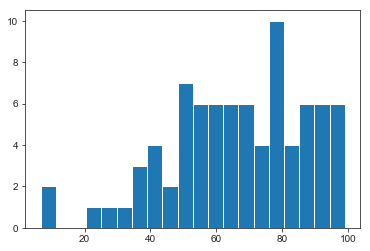

In [3]:
plt.hist(score_df[score_df['model']=='cadrres-wo-sample-bias-weight']['precent_sensitive'], bins=20)

##### Scatter plot

In [4]:
# sns.regplot(data=score_df[score_df['model']=='cadrres-wo-sample-bias-weight'], x='precent_sensitive', y='precision_sensitive')

In [5]:
# sns.regplot(data=score_df[score_df['model']=='cadrres'], x='precent_sensitive', y='precision_sensitive')

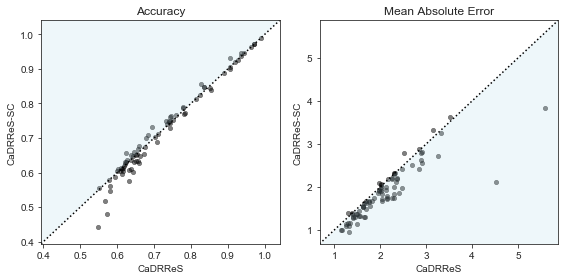

In [6]:
x_model = 'cadrres'
y_model = 'cadrres-wo-sample-bias-weight'
# y_model = 'cadrres-wo-sample-bias'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for ax, s_name in zip(axes.flatten(), ['accurary', 'MAE']):
    x = score_df[score_df['model'] == x_model][s_name].values
    y = score_df[score_df['model'] == y_model][s_name].values
    
    sel = [~np.isnan(x) & ~np.isnan(y)]
    x = x[sel]
    y = y[sel]
    
    min_val = np.nanmin([np.nanmin(x), np.nanmin(y)])
    max_val = np.nanmax([np.nanmax(x), np.nanmax(y)])
    margin = 0.05 * max_val
    min_val = min_val-margin
    max_val = max_val+margin

    ax.scatter(x, y, s=20, color='black', linewidth=0.5, alpha=0.5)
    ax.plot((min_val, max_val), (min_val, max_val), color='black', linestyle=':')
    ax.set_xlim((min_val, max_val))
    ax.set_ylim((min_val, max_val))
    
    if s_name in ['MAE']:
        polygon = patches.Polygon(np.array([(min_val, min_val), (max_val, min_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
    else:
        polygon = patches.Polygon(np.array([(min_val, min_val), (min_val, max_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
    ax.add_patch(polygon)
    
    ax.set_xlabel('CaDRReS')
    ax.set_ylabel('CaDRReS-SC')
    
    
axes.flatten()[0].set_title('Accuracy')
axes.flatten()[1].set_title('Mean Absolute Error')
    
plt.tight_layout()
plt.savefig('../figure/Figure2C_scatter.svg')

In [12]:
m1 = 'cadrres'
m2 = 'cadrres-wo-sample-bias-weight'

for s_name in ['accurary', 'MAE']:
    s_df = score_df[['drug_id', 'model', s_name]].pivot(index='drug_id', columns='model', values=s_name)
    print (s_name)
    
    print (np.sum(s_df[m1] <= s_df[m2]) / s_df[m1].shape[0], np.sum(s_df[m1] > s_df[m2]) / s_df[m1].shape[0])
    print (np.mean((s_df[m2] - s_df[m1]) / s_df[m1]))

accurary
0.5061728395061729 0.49382716049382713
-0.0069026473132480165
MAE
0.14814814814814814 0.8518518518518519
-0.09040271806280181


In [13]:
np.sum(s_df[m2].isnull())

0

##### Boxplot

In [9]:
stacked_score_df = score_df.set_index(['drug_id', 'model']).stack().reset_index()
stacked_score_df.columns = ['drug_id', 'model', 'score_name', 'score']

Ttest_relResult(statistic=1.4359812045784726, pvalue=0.15490652369184102)


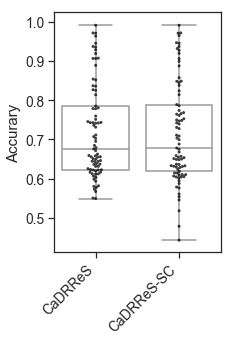

In [10]:
sns.set(font_scale=1.25, style='ticks')

fig, ax = plt.subplots(figsize=(3.5, 5))

s_name = 'accurary' # accurary, spearman | MAE | f1 | f1_sensitive | precision_sensitive

df = stacked_score_df[stacked_score_df['score_name']==s_name]

pivot_df = df.pivot(index='drug_id', columns='model', values='score')
x = pivot_df[pivot_df.columns[0]].values
y = pivot_df[pivot_df.columns[1]].values
print (stats.ttest_rel(x, y))

# sns.violinplot(data=df, x='model', y='score', color='lightgrey', inner='box', ax=ax)
sns.swarmplot(data=df, x='model', y='score', color='black', s=3, alpha=.75, ax=ax)
sns.boxplot(data=df, x='model', y='score', color='white', fliersize=0, ax=ax)
ax.set_xticklabels(['CaDRReS', 'CaDRReS-SC'], rotation=45, ha='right') # 'CaDRReS\nno-bias', 

ax.set_ylabel(s_name[0].upper() + s_name[1:])
ax.set_xlabel('')

# ax.set_ylim((0.5, 4.5))
# ax.set_ylim((0, 0.6))
# ax.set_ylim((0.4, 1.09))

plt.tight_layout()
plt.savefig('../figure/Figure2C_{}.svg'.format(s_name))

### Figure 2C (v2 HNSC)

In [322]:
# # model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias', 'cadrres-wo-sample-bias-weight']
# model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias-weight_HNSC']

# score_df = pd.read_excel('../result/cv_pred/cv_score_summary_HNSC.xlsx')
# score_df = score_df[score_df['precent_sensitive'] >= 50]
# score_df = score_df[score_df['model'].isin(model_spec_name_list)]

# len(set(score_df['drug_id']))

In [323]:
# plt.hist(score_df[score_df['model']=='cadrres']['precent_sensitive'], bins=20)

##### Scatter plot

In [324]:
# x_model = 'cadrres'
# y_model = 'cadrres-wo-sample-bias-weight_HNSC'
# # y_model = 'cadrres-wo-sample-bias'

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# for ax, s_name in zip(axes.flatten(), ['accurary', 'MAE']):
#     x = score_df[score_df['model'] == x_model][s_name].values
#     y = score_df[score_df['model'] == y_model][s_name].values
    
#     sel = [~np.isnan(x) & ~np.isnan(y)]
#     x = x[sel]
#     y = y[sel]
    
#     min_val = np.nanmin([np.nanmin(x), np.nanmin(y)])
#     max_val = np.nanmax([np.nanmax(x), np.nanmax(y)])
#     margin = 0.05 * max_val
#     min_val = min_val-margin
#     max_val = max_val+margin

#     ax.scatter(x, y, s=20, color='black', linewidth=0.5, alpha=0.5)
#     ax.plot((min_val, max_val), (min_val, max_val), color='black', linestyle=':')
#     ax.set_xlim((min_val, max_val))
#     ax.set_ylim((min_val, max_val))
    
#     if s_name in ['MAE']:
#         polygon = patches.Polygon(np.array([(min_val, min_val), (max_val, min_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
#     else:
#         polygon = patches.Polygon(np.array([(min_val, min_val), (min_val, max_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
#     ax.add_patch(polygon)
    
#     ax.set_xlabel('CaDRReS')
#     ax.set_ylabel('CaDRReS-SC')

# axes.flatten()[0].set_title('Accurary')
# axes.flatten()[1].set_title('Mean Absolute Error')
    
# plt.tight_layout()
# plt.savefig('../figure/Figure2C_scatter_HNSC.svg')

##### Boxplot

In [320]:
# stacked_score_df = score_df.set_index(['drug_id', 'model']).stack().reset_index()
# stacked_score_df.columns = ['drug_id', 'model', 'score_name', 'score']

In [325]:
# sns.set(font_scale=1.25, style='ticks')

# fig, ax = plt.subplots(figsize=(3.5, 5))

# s_name = 'MAE' # accurary, spearman | MAE | f1 | f1_sensitive | precision_sensitive

# df = stacked_score_df[stacked_score_df['score_name']==s_name]

# pivot_df = df.pivot(index='drug_id', columns='model', values='score')
# x = pivot_df[pivot_df.columns[0]].values
# y = pivot_df[pivot_df.columns[1]].values
# print (stats.ttest_rel(x, y))

# # sns.violinplot(data=df, x='model', y='score', color='lightgrey', inner='box', ax=ax)
# sns.swarmplot(data=df, x='model', y='score', color='black', s=3, alpha=.75, ax=ax)
# sns.boxplot(data=df, x='model', y='score', color='white', fliersize=0, ax=ax)
# ax.set_xticklabels(['CaDRReS', 'CaDRReS-SC'], rotation=45, ha='right') # 'CaDRReS\nno-bias', 

# ax.set_ylabel(s_name[0].upper() + s_name[1:])
# ax.set_xlabel('')

# # ax.set_ylim((0.5, 4.5))
# # ax.set_ylim((0, 0.6))
# # ax.set_ylim((0.4, 1.09))
    
# plt.tight_layout()
# plt.savefig('../figure/Figure2C_{}_HNSC.svg'.format(s_name))

### Supplementary

In [14]:
import matplotlib.patches as patches

In [15]:
def logistic(x_vals, x0, k):
    return 100 / (1 + np.e**(-k * (x_vals - x0)))

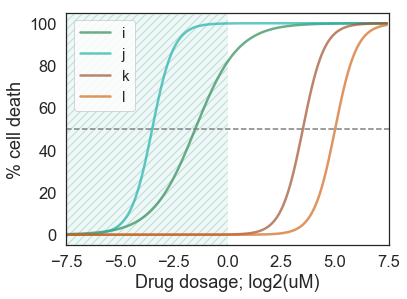

In [16]:
size = 7.5

dosages = np.arange(-size, size, 0.1)

response_dict = {}
response_dict['i'] = logistic(dosages, 6-size, 1)
response_dict['j'] = logistic(dosages, 4-size, 2)
response_dict['k'] = logistic(dosages, 11-size, 2)
response_dict['l'] = logistic(dosages, 12.5-size, 2)

color_dict = {}
color_dict['i'] = 'seagreen'
color_dict['j'] = 'lightseagreen'
color_dict['k'] = 'sienna'
color_dict['l'] = 'chocolate'

sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(6, 4.5))

for d, resp in response_dict.items():
    ax.plot(dosages, resp, label=d, linewidth=2.5, alpha=0.7, color=color_dict[d])
    
ax.axhline(y=50, linestyle='--', color='grey')
    
rect = patches.Rectangle((-size,-5),size,110,linewidth=0,edgecolor='green',facecolor='lightblue', hatch='///', alpha=0.2)
ax.add_patch(rect)
    
ax.set_xlim((-size, size))
ax.set_ylim((-5, 105))
ax.set_xlabel('Drug dosage; log2(uM)')
ax.set_ylabel('% cell death')
plt.legend(fontsize=15)

plt.tight_layout()

plt.savefig('../figure/Figure2D.svg')

### Figure 2D

- CaDRReS_package/notebook/cadrres_train_models_sample_weight.ipynb
- CaDRReS_package/notebook/todo_cadrres_predict_with_gdsc_model.ipynb

In [17]:
cadrres_model_dict2 = pickle.load(open('../../CaDRReS_package/output_weighted/hn_84_drug_cw_dw10_100000_param_dict.pickle', 'rb'))
cadrres_output_dict2 = pickle.load(open('../../CaDRReS_package/output_weighted/hn_84_drug_cw_dw10_100000_output_dict.pickle', 'rb'))

In [18]:
gdsc_sample_df = pd.read_csv('../../CaDRReS_package/data/drug_response/GDSC_tissue_info.csv', index_col=0)
gdsc_sample_df.index = gdsc_sample_df.index.astype(str)

gdsc_sample_list = pd.read_csv('../../CaDRReS_package/data/drug_response/gdsc_all_abs_ic50_bayesian_sigmoid.csv', index_col=0).index.astype(str)

gdsc_hn_sample_list = gdsc_sample_df[gdsc_sample_df['TCGA_CLASS']=='HNSC'].index

gdsc_drug_df = pd.read_excel('../../CaDRReS_package/data/drug_response/05_drug_ref_dosage.xlsx', index_col=0)
gdsc_drug_df = gdsc_drug_df[gdsc_drug_df['num_dosage']==9]
gdsc_drug_df.index = gdsc_drug_df.index.astype(str)

In [19]:
gdsc_drug_df.loc['1032']

Drug Name                                  Afatinib
Synonyms                  BIBW2992, Tovok, Gilotrif
Target                                  ERBB2, EGFR
Target Pathway                       EGFR signaling
Selleckchem Cat#                              S1011
CAS number                              439081-18-2
PubCHEM                                    10184653
Others                                          NaN
Anti-Cancer                             Anti-Cancer
Kinase Inhibitor                   Kinase Inhibitor
Compound                        Afatinib (BIBW2992)
FDA approved for HN                             NaN
AC/KI                                          True
dif_mu                                        0.022
dif_std                                         5.5
variance                                         15
entropy                                         7.6
has_target                                    ERBB2
log2_median_ic50                                4.8
median_ic50 

##### Plot

In [20]:
drug_id = '1032'

In [21]:
x_all = np.array(cadrres_output_dict2['obs_train_df'][[drug_id]]).flatten()
y_all = np.array(cadrres_output_dict2['pred_train_df'][[drug_id]]).flatten()
scor_all, pval_all = stats.spearmanr(x_all[~np.isnan(x_all)], y_all[~np.isnan(x_all)])
print (scor_all, pval_all)

0.3266851205900306 1.3721520453063546e-22


In [22]:
x = np.array(cadrres_output_dict2['obs_train_df'].loc[gdsc_hn_sample_list][[drug_id]]).flatten()
y = np.array(cadrres_output_dict2['pred_train_df'].loc[gdsc_hn_sample_list][[drug_id]]).flatten()
scor, pval = stats.spearmanr(x[~np.isnan(x)], y[~np.isnan(x)])
print (scor, pval)

0.9456073338426279 3.6499833439762743e-17


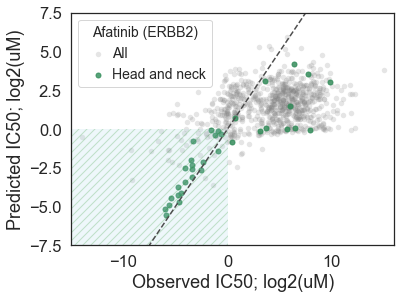

In [23]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(6, 4.5))


ax.scatter(x_all[~np.isnan(x_all)], y_all[~np.isnan(x_all)], s=30, color='grey', linewidth=0, alpha=0.2, label='All')
ax.scatter(x[~np.isnan(x)], y[~np.isnan(x)], color='seagreen', s=25, alpha=0.8, label='Head and neck')
# ax.axvline(x=gdsc_drug_df.loc[drug_id, 'log2_max_conc'])

ax.set_xlabel('Observed IC50; log2(uM)')
ax.set_ylabel('Predicted IC50; log2(uM)')

min_val = np.nanmin(x_all)
max_val = np.nanmax(x_all)
margin = 1
y_size = 7.5
ax.plot([min_val-margin, max_val+margin], [min_val-margin, max_val+margin], ls="--", c=".3")

rect = patches.Rectangle((min_val-margin,-y_size),-(min_val-margin) ,y_size,linewidth=0,edgecolor='green',facecolor='lightblue', hatch='///', alpha=0.2)
ax.add_patch(rect)

plt.xlim((min_val-margin, max_val+margin))
plt.ylim((-y_size, y_size))

plt.tight_layout()

plt.rcParams['legend.title_fontsize'] = 14
plt.legend(fontsize=14, handletextpad=0.03, title="Afatinib (ERBB2)")

plt.savefig('../figure/Figure2D.svg')